In [108]:
import numpy as np
import pandas as pd
from time import time
from sklearn import metrics
from collections import defaultdict
import matplotlib.pyplot as plt
import glob
import seaborn as sns


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.metrics.cluster import contingency_matrix, homogeneity_score, completeness_score, adjusted_rand_score, adjusted_mutual_info_score, v_measure_score
from sklearn.metrics.cluster import contingency_matrix

## profiling
from pandas_profiling import ProfileReport
%matplotlib inline

## Gas Turbine CO and NOx Emission Data Set

In [201]:
path = 'pp_gas_emission/'
all_files = glob.glob(path + "/*.csv")
li = []
years = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    df['year'] = int(filename[-8:-4])
    years.append(int(int(filename[-8:-4])))
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

## predict the criteria pollutants in a particular region - CO

## Standardize feature columns 

In [202]:
frame.drop('NOX',axis =1,inplace=True)

In [204]:
years

[2013, 2015, 2014, 2012, 2011]

One hot encode the year column (doesn't work for profiler)

In [63]:
# one_hot = pd.get_dummies(frame['year'])
# frame = frame.drop('year',axis=1)
# frame = frame.join(one_hot)
# # frame["year_cat"] = frame["year"].astype("category") 

In [205]:
frame['year_cat'] =  frame['year'].astype('str')

Set the feature columns

In [206]:
feature_columns = list(frame.columns)
feature_columns = list(set(feature_columns) - set(['NOX','CO','year']))
num_feature_columns = list(set(feature_columns)-set(['year_cat']))

In [ ]:
frame.dtypes

In [90]:
profile = ProfileReport(frame[feature_columns], title="frame Profiling Report",explorative=True)

In [58]:
profile.to_file("gas_report.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 102.40it/s]


In [91]:
profile

Render HTML: 100%|██████████| 1/1 [00:01<00:00,  1.94s/it]


Standardizing columns

In [135]:
frame[num_feature_columns].mean()

AH        77.867015
AT        17.712726
AFDP       3.925518
TIT     1081.428084
TEY      133.506404
AP      1013.070165
CDP       12.060525
TAT      546.158517
GTEP      25.563801
dtype: float64

In [136]:
frame[num_feature_columns].var()

AH      209.130787
AT       55.464530
AFDP      0.598976
TIT     307.524376
TEY     243.941740
AP       41.774841
CDP       1.185475
TAT      46.817896
GTEP     17.606059
dtype: float64

In [137]:
scaler = preprocessing.StandardScaler()
frame_standardized = pd.DataFrame()
frame_standardized[num_feature_columns] = scaler.fit_transform(frame[num_feature_columns])

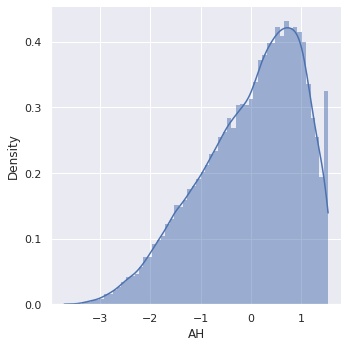

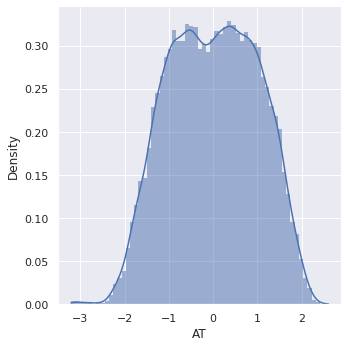

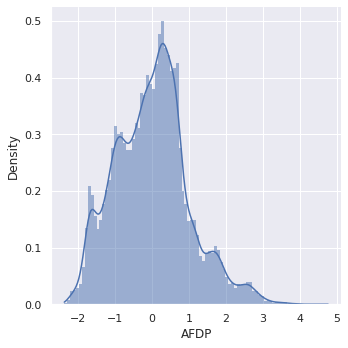

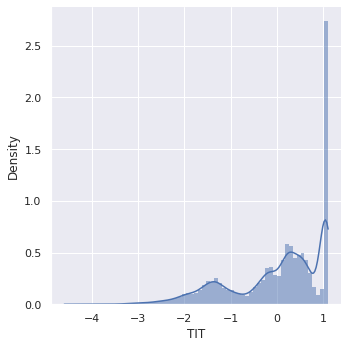

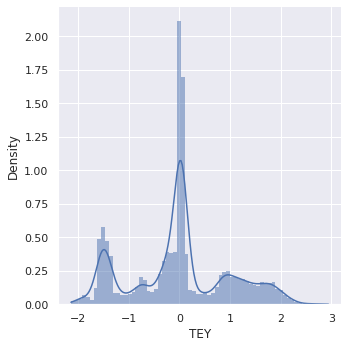

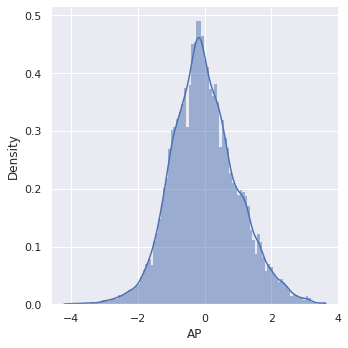

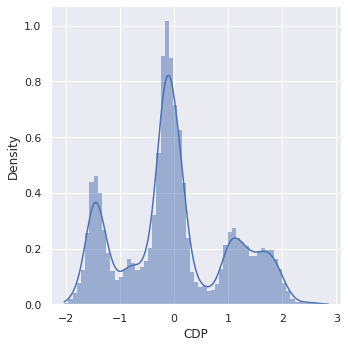

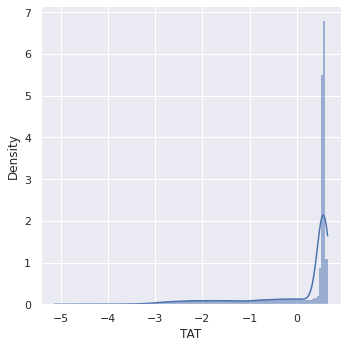

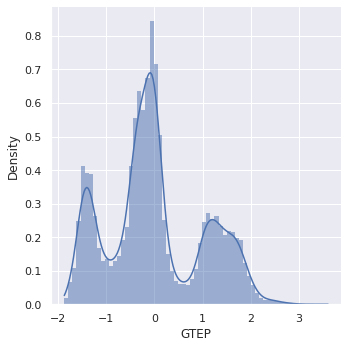

In [185]:

num = frame_standardized.select_dtypes(include=np.number)  # Get numeric columns
n = num.shape[1]  # Number of cols

# fig, axes = plt.subplots(n, 1, figsize=(15,15))  # create subplots

for ax, col in zip(axes, num):  # For each column...
    # plt.figure()
    sns.displot(num[col],kde=True, stat="density", linewidth=0)   # Plot histogaerm
    ax.axvline(num[col].mean(), c='k')  # Plot mean

In [154]:
def plot_column(column):
    sns.displot(column,kde=True, stat="density", linewidth=0)   # Plot histogaerm
    ax.axvline(column.mean(), c='k')

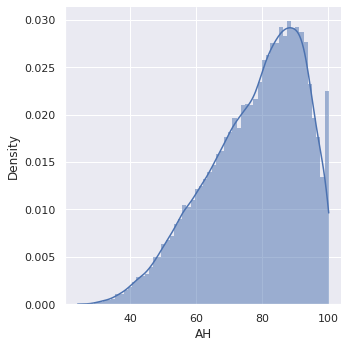

In [184]:
plot_column(frame['AH'])

In [209]:
frame['GTEP'].skew()

0.3290213527194839

## yearly trends
plot the yearly trends for each feature and compare
them.

In [218]:
years

[2013, 2015, 2014, 2012, 2011]

In [227]:
def plot_timeseries(column_name):
    ax = frame.loc[frame['year']==2013][column_name].plot(figsize=(10,10))
    for year in years:
        frame.loc[frame['year']==year].reset_index()[column_name].plot(figsize=(10,10),ax =ax)
    ax.legend(years)
    ax.set_xlabel('Time')
    ax.set_ylabel(column_name)
    return 



In [229]:
num_feature_columns

['AH', 'AT', 'AFDP', 'TIT', 'TEY', 'AP', 'CDP', 'TAT', 'GTEP']

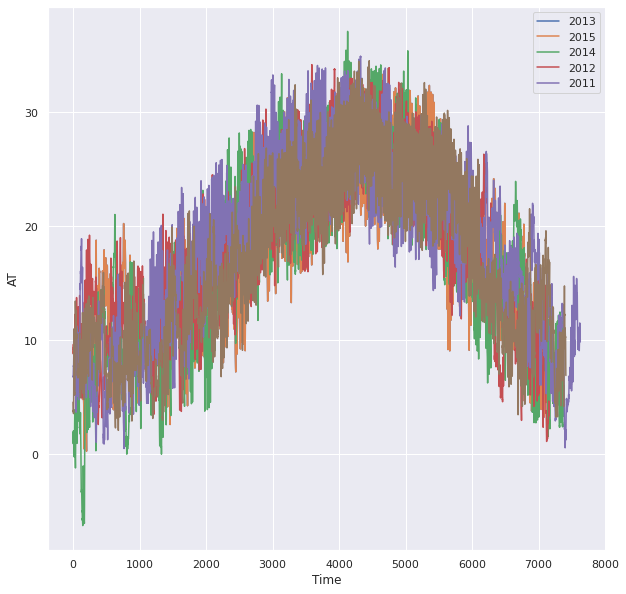

In [ ]:
plot_timeseries('AT')

In [ ]:
plot_timeseries('AH')

## Feature Selection 

In [231]:
from sklearn.feature_selection import mutual_info_regression as mi_reg


In [236]:
df_mi = pd.DataFrame(mi_reg( frame['CO'],frame[num_feature_columns]), index = num_feature_columns).apply(lambda x: x / x.max(), axis = 1)


ValueError: Expected 2D array, got 1D array instead:
array=[ 9.3472 11.016  10.75   ...  7.9632  6.2494  4.9816].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

## Linear Regression